# Análise de Acidentes (PRF): Um Estudo Comparativo entre RN e PB

### Análise Exploratória de Dados (EDA) de 2017 a 2025 com foco nas capitais Natal e João Pessoa.

## 1. Introdução

Este notebook realiza uma Análise Exploratória de Dados (EDA) sobre os acidentes de trânsito registrados pela Polícia Rodoviária Federal (PRF) entre 2017 e 2025. O foco é um estudo comparativo entre os estados do Rio Grande do Norte (RN) e Paraíba (PB), com uma análise mais aprofundada nas rodovias federais que cortam suas capitais, Natal e João Pessoa.

Os dados brutos, originalmente distribuídos em múltiplos arquivos anuais, foram previamente processados, limpos e consolidados. Esta análise parte, portanto, de um dataset já preparado para a investigação.

**Objetivo:** Entender o volume, as causas, os tipos e a gravidade dos acidentes para identificar padrões e responder à pergunta: *Qual o perfil dos acidentes e o principal fator de risco nessas rodovias?*

In [1]:
# Célula 1: Importação das Bibliotecas

# Bibliotecas para manipulação e análise de dados
import pandas as pd

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo visual dos gráficos para o relatório
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas e configurações de visualização aplicadas.")

Bibliotecas importadas e configurações de visualização aplicadas.


## 2. Carregamento dos Dados

Os dados são carregados a partir do dataset adicionado a este notebook. Para evitar erros, o caminho completo de cada arquivo CSV será copiado diretamente da interface do Kaggle.

In [2]:
# Célula 2: Carregamento dos Dados (Método de Caminho Exato)

# --- INSTRUÇÃO IMPORTANTE ---
# 1. No painel "Data" (à direita), passe o mouse sobre cada nome de arquivo.
# 2. Clique no ícone de "copiar caminho" (parece uma prancheta).
# 3. Cole o caminho EXATO para cada variável abaixo.

# Argumentos que o pandas precisa para ler o CSV corretamente
read_args = {
    'delimiter': ';',
    'encoding': 'utf-8-sig'
}

print("Carregando datasets consolidados...")
try:
    path_rn    = '/kaggle/input/acidentes-rn-e-pb-2017-a-2025-capitais/raw/acidentes_RN.csv'
    path_pb    = '/kaggle/input/acidentes-rn-e-pb-2017-a-2025-capitais/raw/acidentes_PB.csv'
    path_natal = '/kaggle/input/acidentes-rn-e-pb-2017-a-2025-capitais/raw/acidentes_NATAL.csv'
    path_jp    = '/kaggle/input/acidentes-rn-e-pb-2017-a-2025-capitais/raw/acidentes_JOAO_PESSOA.csv'
    # ----------------------------------------

    # Carregamos usando os caminhos exatos
    df_rn = pd.read_csv(path_rn, **read_args)
    df_pb = pd.read_csv(path_pb, **read_args)
    df_natal = pd.read_csv(path_natal, **read_args)
    df_jp = pd.read_csv(path_jp, **read_args)

    print("Dados carregados com sucesso!")
    print(f"-> RN: {len(df_rn):,} registros")
    print(f"-> PB: {len(df_pb):,} registros")
    print(f"-> Natal: {len(df_natal):,} registros")
    print(f"-> João Pessoa: {len(df_jp):,} registros")

except FileNotFoundError as e:
    print(f"--- ERRO: Arquivo não encontrado ---")
    print(f"O notebook não conseguiu encontrar o arquivo: {e.filename}")
    print("Verifique se você copiou e colou os 4 caminhos corretamente do painel 'Data'.")
except Exception as e:
    print(f"ERRO inesperado ao carregar os dados: {e}")

Carregando datasets consolidados...
Dados carregados com sucesso!
-> RN: 58,839 registros
-> PB: 98,977 registros
-> Natal: 10,209 registros
-> João Pessoa: 21,612 registros


## 3. Análise Temporal: O Volume de Acidentes está Crescendo?

A primeira etapa da análise é entender a tendência histórica. O número de ocorrências registradas tem aumentado ou diminuído ao longo do período de 2017 a 2025?

*Nota: Os dados de 2025 podem ser parciais, dependendo da data em que os dados brutos foram extraídos.*

In [3]:
# Célula 3: Preparação dos Dados para Análise Temporal

def preparar_dados_temporais(df, nome_col_data='data_inversa'):
    """Converte a coluna de data para o formato datetime e extrai o ano."""
    # Garante que a coluna de data esteja no formato correto
    df[nome_col_data] = pd.to_datetime(df[nome_col_data])
    # Cria uma nova coluna 'ano' para facilitar o agrupamento
    df['ano'] = df[nome_col_data].dt.year
    return df

# Aplica a função de preparação em todos os DataFrames
df_rn = preparar_dados_temporais(df_rn)
df_pb = preparar_dados_temporais(df_pb)
df_natal = preparar_dados_temporais(df_natal)
df_jp = preparar_dados_temporais(df_jp)

# Agrega os dados para contagem anual de ocorrências
acidentes_ano_rn = df_rn.groupby('ano').size()
acidentes_ano_pb = df_pb.groupby('ano').size()
acidentes_ano_natal = df_natal.groupby('ano').size()
acidentes_ano_jp = df_jp.groupby('ano').size()

print("Dados prontos para a análise temporal.")

Dados prontos para a análise temporal.


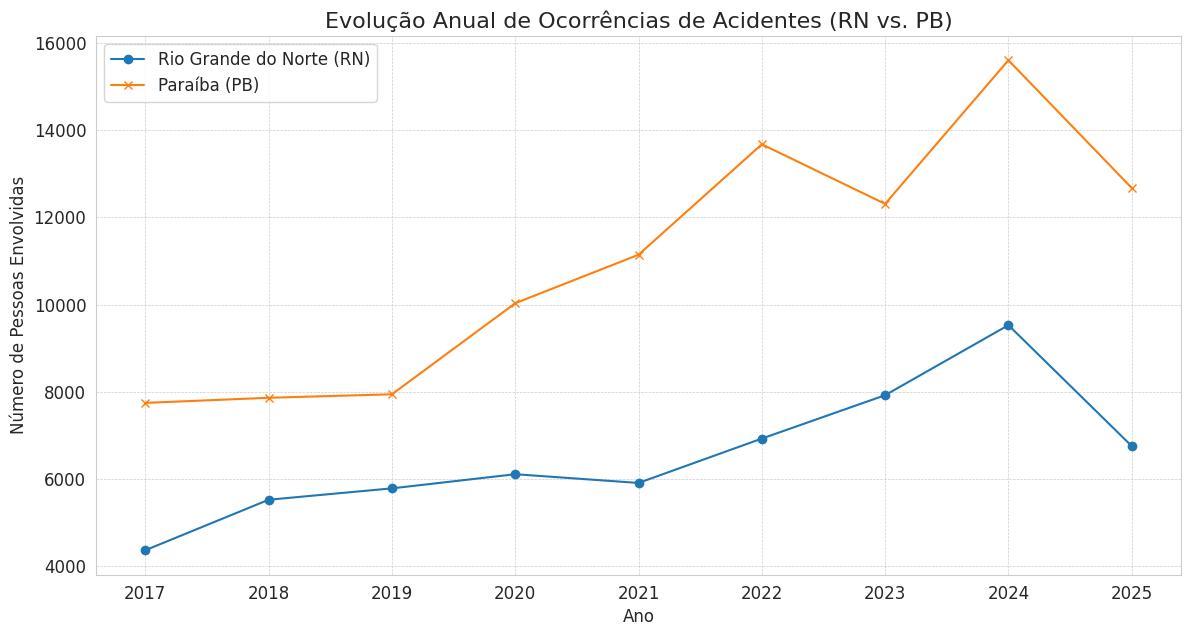

In [4]:
# Célula 4: Gráfico Comparativo de Ocorrências (RN vs. PB)

# Plotagem
acidentes_ano_rn.plot(kind='line', marker='o', label='Rio Grande do Norte (RN)')
acidentes_ano_pb.plot(kind='line', marker='x', label='Paraíba (PB)')

# Estilização do gráfico
plt.title('Evolução Anual de Ocorrências de Acidentes (RN vs. PB)', fontsize=16)
plt.ylabel('Número de Pessoas Envolvidas')
plt.xlabel('Ano')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

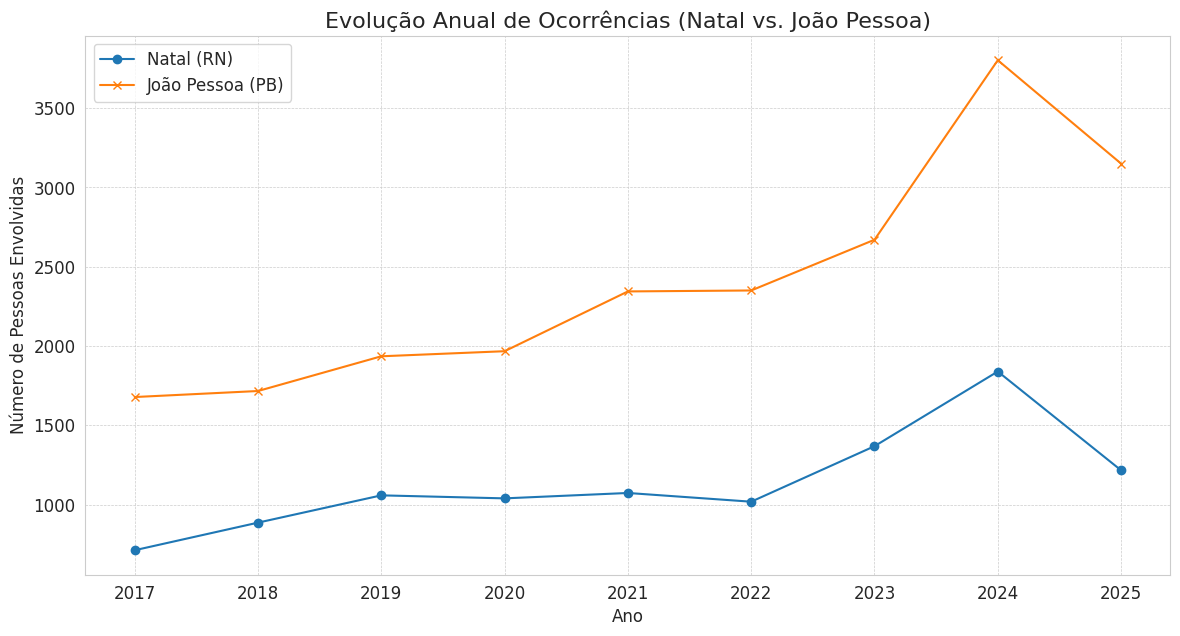

In [5]:
# Célula 5: Gráfico Comparativo de Ocorrências (Natal vs. João Pessoa)

# Plotagem
acidentes_ano_natal.plot(kind='line', marker='o', label='Natal (RN)')
acidentes_ano_jp.plot(kind='line', marker='x', label='João Pessoa (PB)')

# Estilização
plt.title('Evolução Anual de Ocorrências (Natal vs. João Pessoa)', fontsize=16)
plt.ylabel('Número de Pessoas Envolvidas')
plt.xlabel('Ano')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### **Insight Temporal:**
A análise histórica revela que o volume de pessoas envolvidas em acidentes nas rodovias federais da Paraíba é consistentemente superior ao do Rio Grande do Norte. O mesmo padrão se repete em suas capitais, onde **João Pessoa apresenta números significativamente maiores que Natal**.

Ambos os locais mostram um aumento acentuado nas ocorrências a partir de 2022. A questão que surge é: **o que impulsiona essa diferença de volume e perfil?**

## 4. Análise Investigativa: Causas, Tipos e Veículos

Para entender o "porquê" da diferença no volume de acidentes, vamos detalhar a análise, investigando as seguintes dimensões:
- **Causa do Acidente:** O que motivou a ocorrência?
- **Tipo de Acidente:** Qual foi a natureza da colisão/evento?
- **Tipo de Veículo:** Quais veículos estão mais envolvidos?

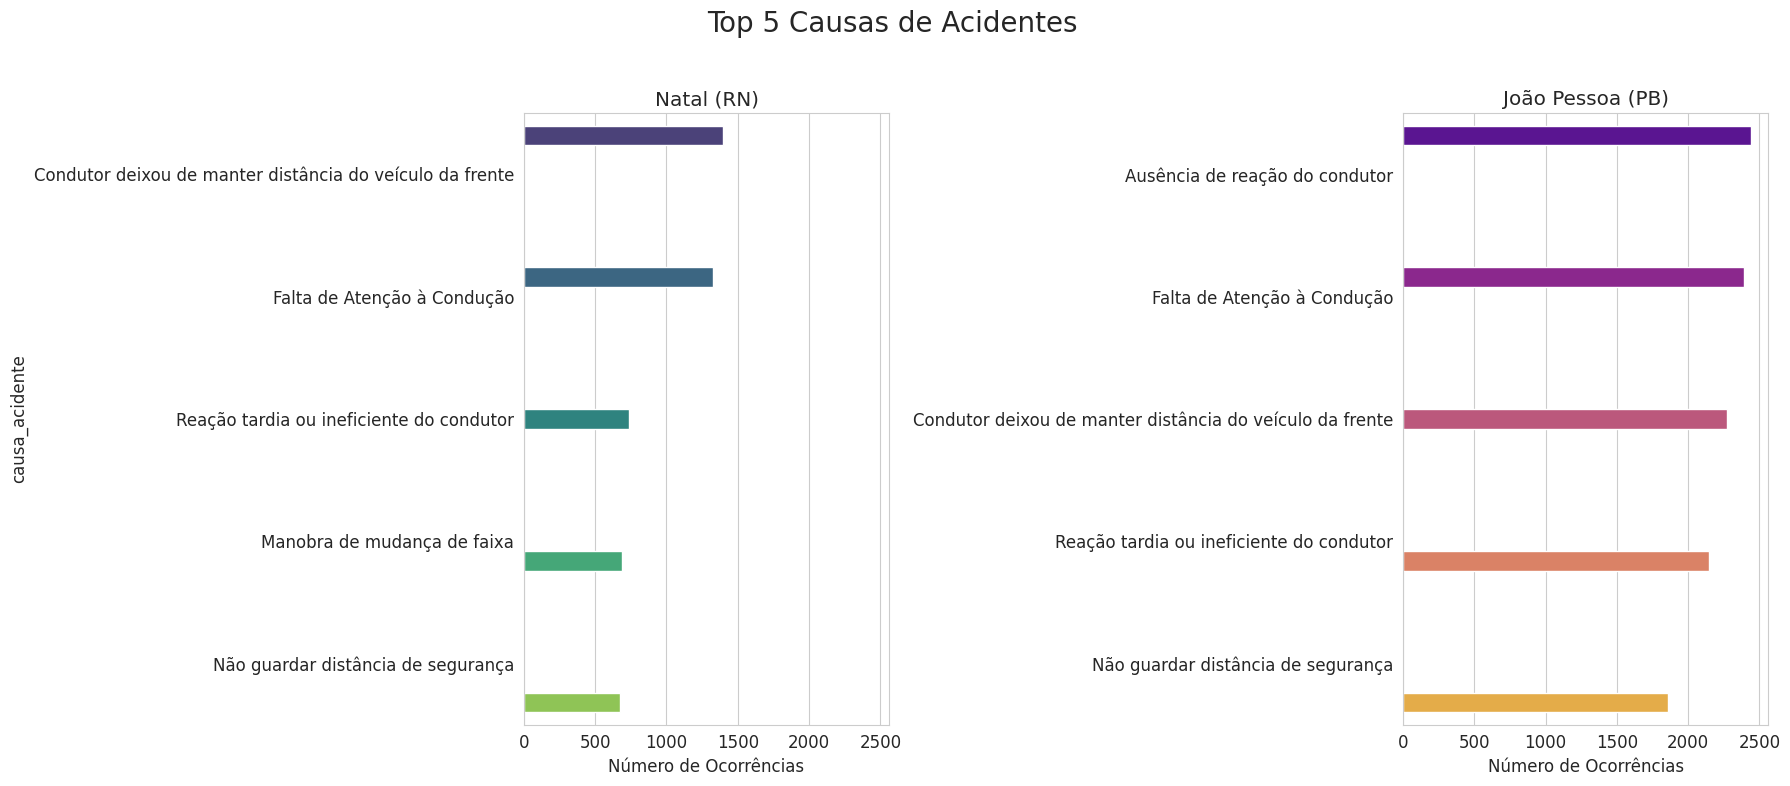


--- Top 5 Causas de Acidentes em Natal ---
causa_acidente
Condutor deixou de manter distância do veículo da frente    1397
Falta de Atenção à Condução                                 1324
Reação tardia ou ineficiente do condutor                     735
Manobra de mudança de faixa                                  685
Não guardar distância de segurança                           676
Name: count, dtype: int64

--- Top 5 Causas de Acidentes em João Pessoa ---
causa_acidente
Ausência de reação do condutor                              2440
Falta de Atenção à Condução                                 2390
Condutor deixou de manter distância do veículo da frente    2272
Reação tardia ou ineficiente do condutor                    2149
Não guardar distância de segurança                          1857
Name: count, dtype: int64


In [6]:
# Célula 6: Análise das Causas de Acidentes (Alinhado)
# (Esta célula corresponde à Célula 12 (d9ec5309) do seu notebook anterior)

top_5_causas_natal = df_natal['causa_acidente'].value_counts().head(5)
top_5_causas_jp = df_jp['causa_acidente'].value_counts().head(5)

# Adicionamos 'sharex=True' para forçar os dois gráficos a usarem a mesma escala no eixo X.
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True)
fig.suptitle('Top 5 Causas de Acidentes', fontsize=20)

# Gráfico para Natal
sns.barplot(
    ax=axes[0], 
    x=top_5_causas_natal.values, 
    y=top_5_causas_natal.index, 
    palette='viridis',
    hue=top_5_causas_natal.index
)
axes[0].set_title('Natal (RN)')
axes[0].set_xlabel('Número de Ocorrências')
axes[0].get_legend().remove() 

# Gráfico para João Pessoa
sns.barplot(
    ax=axes[1], 
    x=top_5_causas_jp.values, 
    y=top_5_causas_jp.index, 
    palette='plasma',
    hue=top_5_causas_jp.index
)
axes[1].set_title('João Pessoa (PB)')
axes[1].set_xlabel('Número de Ocorrências')
axes[1].set_ylabel('')
axes[1].get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Imprimir os dados para referência
print("\n--- Top 5 Causas de Acidentes em Natal ---")
print(top_5_causas_natal)
print("\n--- Top 5 Causas de Acidentes em João Pessoa ---")
print(top_5_causas_jp)

### **Descoberta da Hipótese:**
As causas são muito similares: **"Falta de Atenção"** e **"Não manter distância"**.

No entanto, a análise de *tipo* é reveladora. Embora a "Colisão traseira" (esperada pela causa) seja alta, os tipos **"Queda de ocupante de veículo"** e **"Tombamento"** estão no Top 3 em ambas as cidades.

Isso levanta uma forte hipótese: **Acidentes com motocicletas são um fator crítico.**

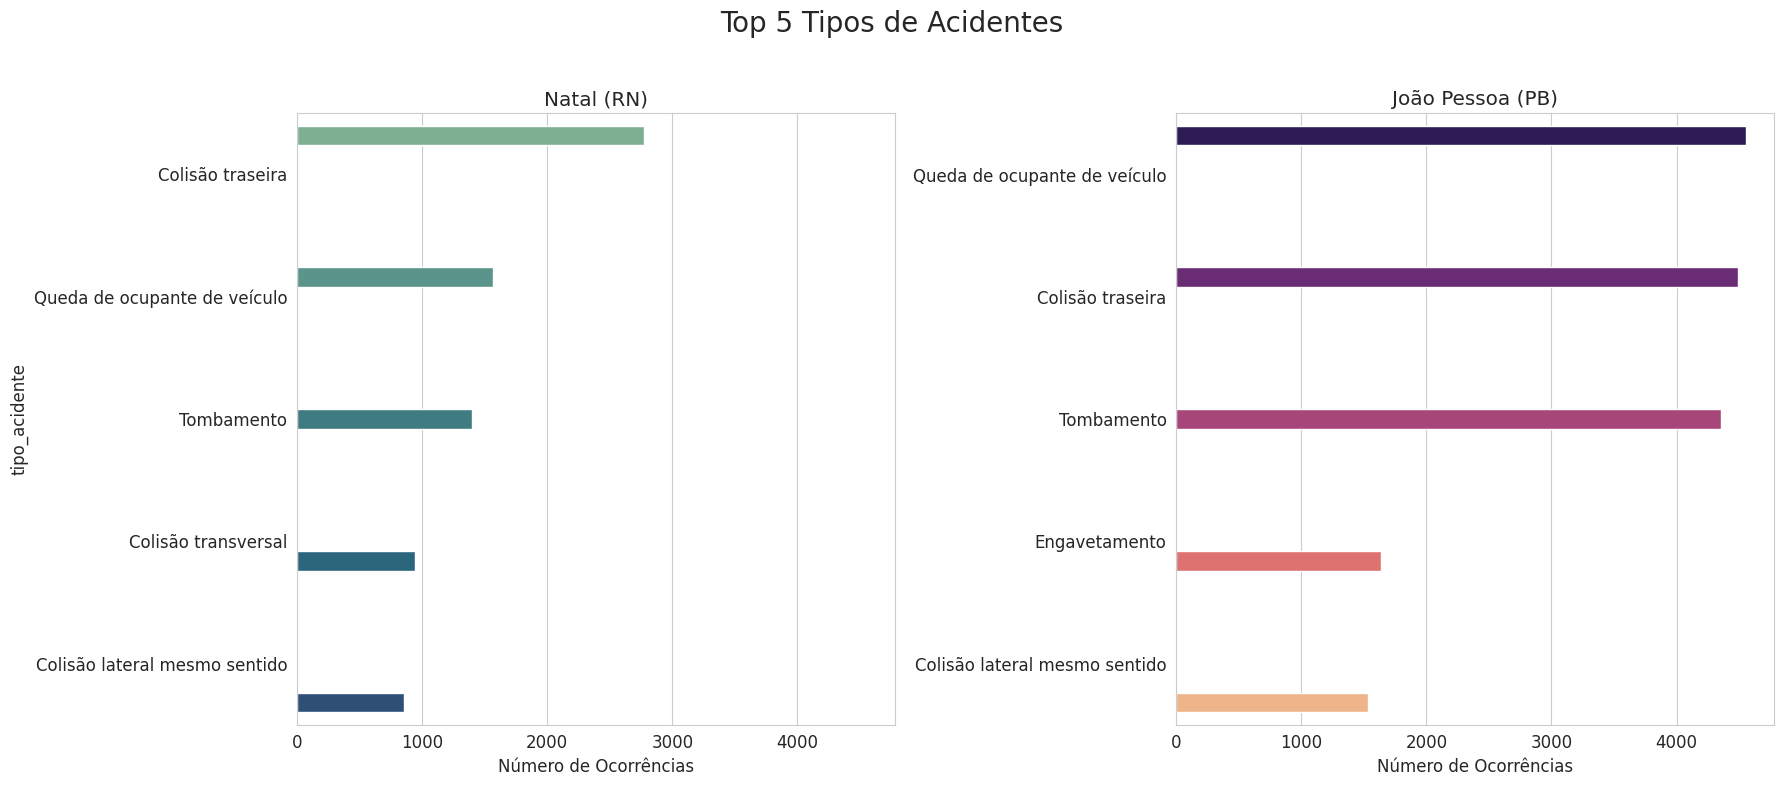


--- Top 5 Tipos de Acidentes em Natal ---
tipo_acidente
Colisão traseira                 2773
Queda de ocupante de veículo     1563
Tombamento                       1400
Colisão transversal               945
Colisão lateral mesmo sentido     853
Name: count, dtype: int64

--- Top 5 Tipos de Acidentes em João Pessoa ---
tipo_acidente
Queda de ocupante de veículo     4552
Colisão traseira                 4489
Tombamento                       4352
Engavetamento                    1636
Colisão lateral mesmo sentido    1537
Name: count, dtype: int64


In [7]:
# Célula 7: Análise dos Tipos de Acidentes
# (Esta célula corresponde à Célula 11 (b4c036bd) do seu notebook anterior)

top_5_tipos_natal = df_natal['tipo_acidente'].value_counts().head(5)
top_5_tipos_jp = df_jp['tipo_acidente'].value_counts().head(5)

# Usamos 'sharex=True' novamente para uma comparação visual justa
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True)
fig.suptitle('Top 5 Tipos de Acidentes', fontsize=20)

# Gráfico para Natal
sns.barplot(
    ax=axes[0], 
    x=top_5_tipos_natal.values, 
    y=top_5_tipos_natal.index, 
    palette='crest',
    hue=top_5_tipos_natal.index
)
axes[0].set_title('Natal (RN)')
axes[0].set_xlabel('Número de Ocorrências')
axes[0].get_legend().remove() # Remove a legenda redundante

# Gráfico para João Pessoa
sns.barplot(
    ax=axes[1], 
    x=top_5_tipos_jp.values, 
    y=top_5_tipos_jp.index, 
    palette='magma',
    hue=top_5_tipos_jp.index
)
axes[1].set_title('João Pessoa (PB)')
axes[1].set_xlabel('Número de Ocorrências')
axes[1].set_ylabel('')
axes[1].get_legend().remove() # Remove a legenda redundante

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Imprimir os dados para referência
print("\n--- Top 5 Tipos de Acidentes em Natal ---")
print(top_5_tipos_natal)
print("\n--- Top 5 Tipos de Acidentes em João Pessoa ---")
print(top_5_tipos_jp)

#### **Descoberta e Confirmação da Hipótese:**
1.  As **causas** são similares, com **"Falta de Atenção"** e **"Não manter distância"** no topo.
2.  Os **tipos** de acidente, no entanto, apontam para **"Queda de ocupante"** e **"Tombamento"** como eventos de alta frequência, especialmente em João Pessoa.
3.  A análise de **veículos** confirma a hipótese: **"Motocicleta"** é o veículo número 1 em envolvimento de acidentes em ambas as capitais, superando os automóveis.

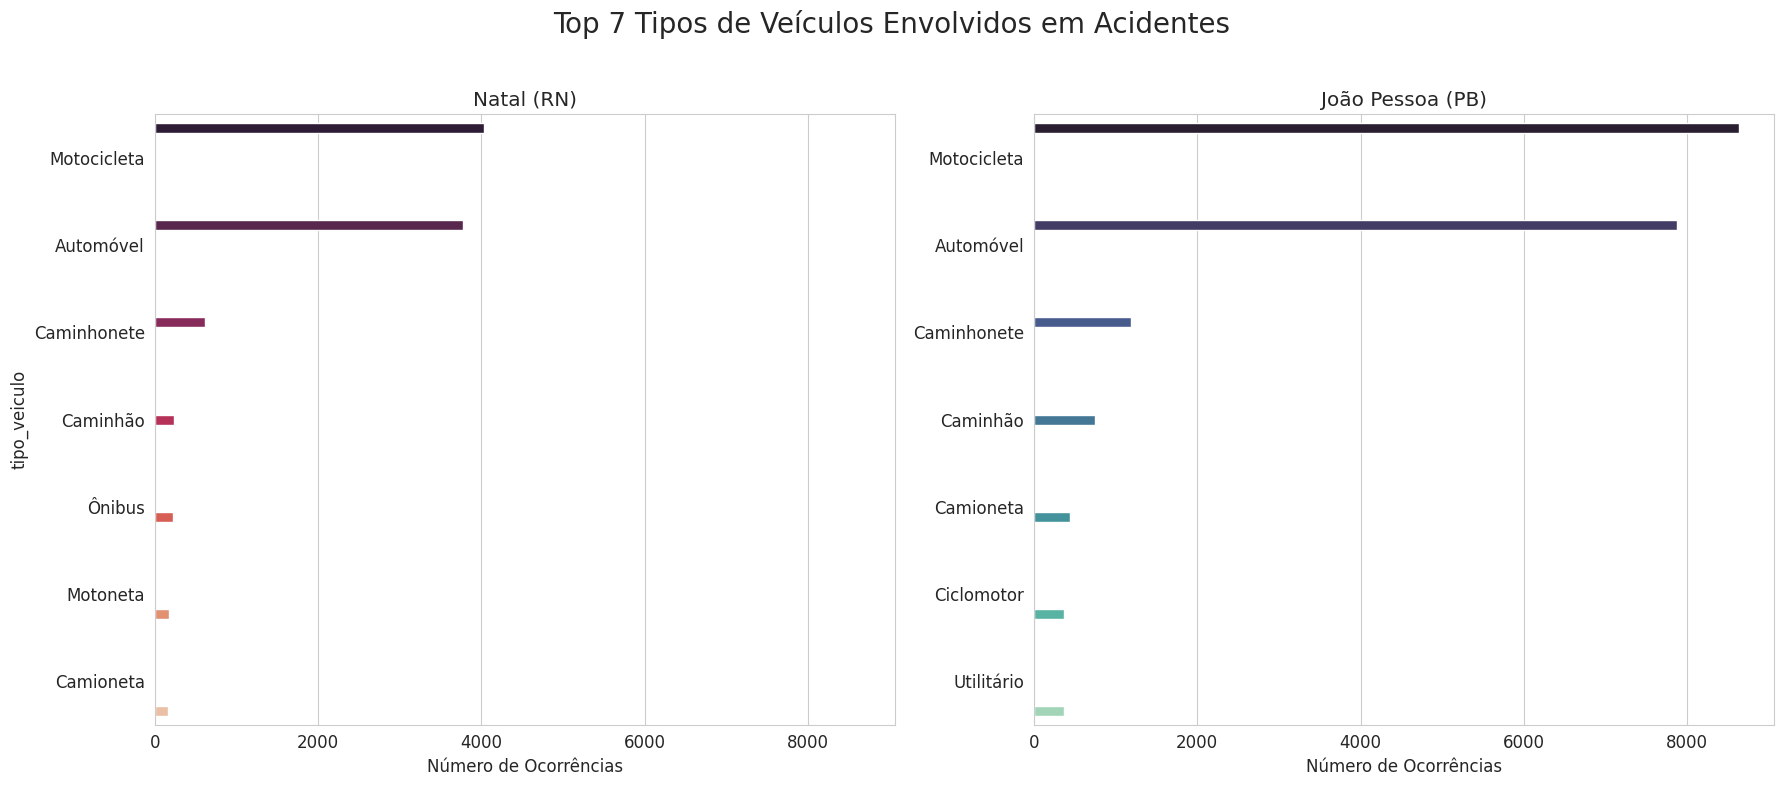


--- Top 7 Tipos de Veículos Envolvidos em Natal ---
tipo_veiculo
Motocicleta    4026
Automóvel      3776
Caminhonete     616
Caminhão        233
Ônibus          228
Motoneta        173
Camioneta       166
Name: count, dtype: int64

--- Top 7 Tipos de Veículos Envolvidos em João Pessoa ---
tipo_veiculo
Motocicleta    8630
Automóvel      7873
Caminhonete    1190
Caminhão        744
Camioneta       439
Ciclomotor      375
Utilitário      374
Name: count, dtype: int64


In [8]:
# Célula 8: Análise dos Tipos de Veículos Envolvidos
# (Esta célula corresponde à Célula 12 (b61a8f45) do seu notebook anterior)

top_veiculos_natal = df_natal['tipo_veiculo'].value_counts().head(7)
top_veiculos_jp = df_jp['tipo_veiculo'].value_counts().head(7)

# Usamos 'sharex=True' para uma comparação visual justa
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True)
fig.suptitle('Top 7 Tipos de Veículos Envolvidos em Acidentes', fontsize=20)

# Gráfico para Natal
sns.barplot(
    ax=axes[0], 
    x=top_veiculos_natal.values, 
    y=top_veiculos_natal.index, 
    palette='rocket',
    hue=top_veiculos_natal.index
)
axes[0].set_title('Natal (RN)')
axes[0].set_xlabel('Número de Ocorrências')
axes[0].get_legend().remove() # Remove a legenda redundante

# Gráfico para João Pessoa
sns.barplot(
    ax=axes[1], 
    x=top_veiculos_jp.values, 
    y=top_veiculos_jp.index, 
    palette='mako',
    hue=top_veiculos_jp.index
)
axes[1].set_title('João Pessoa (PB)')
axes[1].set_xlabel('Número de Ocorrências')
axes[1].set_ylabel('')
axes[1].get_legend().remove() # Remove a legenda redundante

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Imprimir os dados para referência
print("\n--- Top 7 Tipos de Veículos Envolvidos em Natal ---")
print(top_veiculos_natal)
print("\n--- Top 7 Tipos de Veículos Envolvidos em João Pessoa ---")
print(top_veiculos_jp)

#### **Hipótese Confirmada:**
"Motocicleta" é, de fato, o veículo **número 1** em envolvimentos de acidentes nas BRs de ambas as capitais, superando os automóveis.

Isso explica diretamente a alta frequência de "Quedas" e "Tombamentos".

## 5. Análise de Gravidade e Conclusão Final

Sabemos *quantos* acidentes ocorrem, *por que* ocorrem e *com quem*. Agora, vamos medir o impacto humano analisando o `estado_fisico` dos envolvidos.

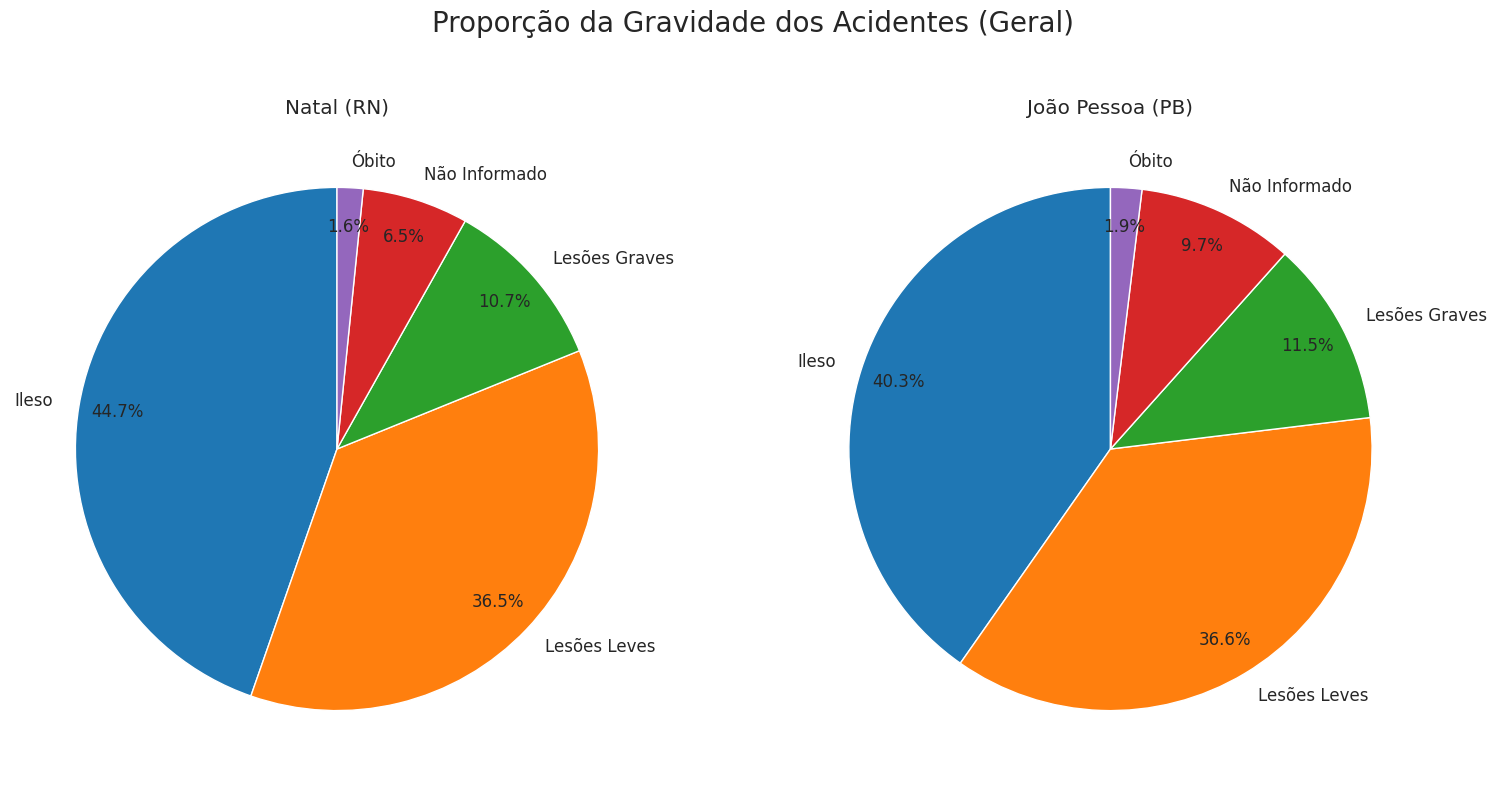


--- Gravidade das Ocorrências em Natal ---
estado_fisico
Ileso            4542
Lesões Leves     3709
Lesões Graves    1090
Não Informado     666
Óbito             163
Name: count, dtype: int64

--- Gravidade das Ocorrências em João Pessoa ---
estado_fisico
Ileso            8562
Lesões Leves     7792
Lesões Graves    2438
Não Informado    2059
Óbito             410
Name: count, dtype: int64


In [9]:
# Célula 9: Análise de Gravidade Geral (Estado Físico)
# (Esta célula corresponde à Célula 13 (ad3b1a09) do seu notebook anterior)

gravidade_natal = df_natal['estado_fisico'].value_counts()
gravidade_jp = df_jp['estado_fisico'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Proporção da Gravidade dos Acidentes (Geral)', fontsize=20)

axes[0].pie(gravidade_natal.values, 
            labels=gravidade_natal.index, 
            autopct='%1.1f%%', 
            startangle=90,
            pctdistance=0.85
           )
axes[0].set_title('Natal (RN)')

axes[1].pie(gravidade_jp.values, 
            labels=gravidade_jp.index, 
            autopct='%1.1f%%', 
            startangle=90,
            pctdistance=0.85
           )
axes[1].set_title('João Pessoa (PB)')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

# Imprimir os dados para referência
print("\n--- Gravidade das Ocorrências em Natal ---")
print(gravidade_natal)
print("\n--- Gravidade das Ocorrências em João Pessoa ---")
print(gravidade_jp)

### **Descoberta Chave: O Fator Motocicleta na Gravidade**

A análise geral mostra que João Pessoa tem mais que o dobro de óbitos (410) e lesões graves (2438) que Natal (163 e 1090, respectivamente).

Mas a descoberta mais impactante vem quando cruzamos a gravidade com nossa hipótese das motocicletas.


Total de ocorrências com motocicletas em Natal: 4026
Total de ocorrências com motocicletas em João Pessoa: 8630


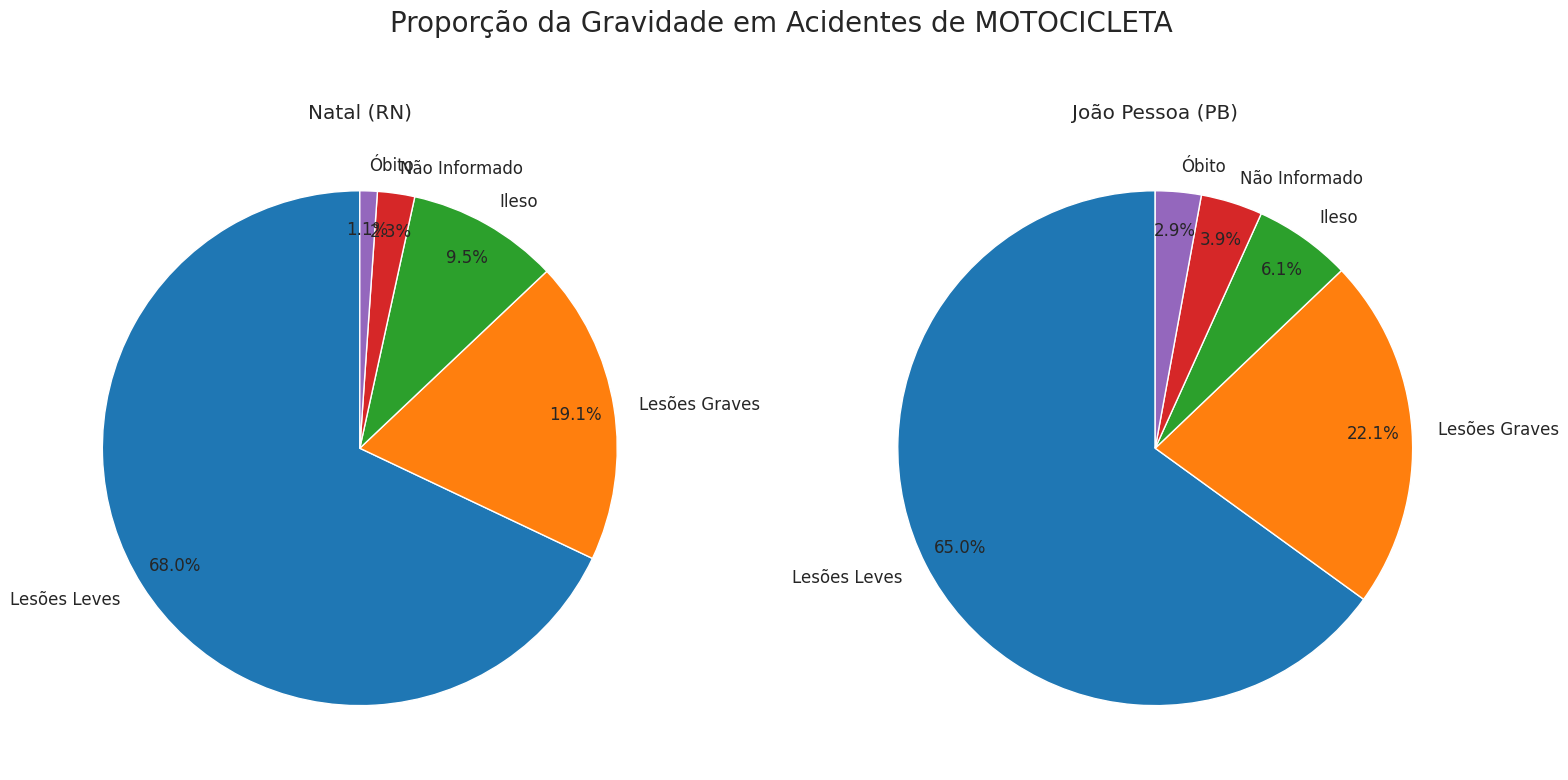


--- Gravidade das Ocorrências com Motocicletas (Natal) ---
estado_fisico
Lesões Leves     2736
Lesões Graves     769
Ileso             383
Não Informado      94
Óbito              44
Name: count, dtype: int64

--- Gravidade das Ocorrências com Motocicletas (João Pessoa) ---
estado_fisico
Lesões Leves     5611
Lesões Graves    1908
Ileso             528
Não Informado     335
Óbito             248
Name: count, dtype: int64


In [10]:
# Célula 10: Análise de Gravidade FOCADA em Motocicletas
# (Esta célula corresponde à Célula 14 (36d91e8b) do seu notebook anterior)

# Filtrar apenas para motocicletas
df_motos_natal = df_natal[df_natal['tipo_veiculo'] == 'Motocicleta'].copy()
df_motos_jp = df_jp[df_jp['tipo_veiculo'] == 'Motocicleta'].copy()

print(f"\nTotal de ocorrências com motocicletas em Natal: {len(df_motos_natal)}")
print(f"Total de ocorrências com motocicletas em João Pessoa: {len(df_motos_jp)}")

# Contar o estado físico APENAS dos motociclistas
gravidade_motos_natal = df_motos_natal['estado_fisico'].value_counts()
gravidade_motos_jp = df_motos_jp['estado_fisico'].value_counts()

# Plotagem
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Proporção da Gravidade em Acidentes de MOTOCICLETA', fontsize=20)

axes[0].pie(
    gravidade_motos_natal.values, 
    labels=gravidade_motos_natal.index, 
    autopct='%1.1f%%', 
    startangle=90,
    pctdistance=0.85
)
axes[0].set_title('Natal (RN)')

axes[1].pie(
    gravidade_motos_jp.values, 
    labels=gravidade_motos_jp.index, 
    autopct='%1.1f%%', 
    startangle=90,
    pctdistance=0.85
)
axes[1].set_title('João Pessoa (PB)')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

# Imprimir os dados para referência
print("\n--- Gravidade das Ocorrências com Motocicletas (Natal) ---")
print(gravidade_motos_natal)
print("\n--- Gravidade das Ocorrências com Motocicletas (João Pessoa) ---")
print(gravidade_motos_jp)

## 6. Conclusão Final

A análise dos dados de 2017 a 2025 revela uma realidade preocupante e responde à nossa pergunta inicial:

1.  **Volume e Tendência:** O volume de acidentes nas rodovias federais da Paraíba é consistentemente maior que no Rio Grande do Norte, um padrão que se repete de forma ainda mais acentuada entre João Pessoa e Natal.
2.  **Causas vs. Veículos:** Embora as *causas* dos acidentes sejam comuns a todos os motoristas (principalmente "Falta de Atenção" e "Não manter distância"), a investigação dos *veículos* envolvidos confirmou que as **motocicletas** são o principal modal envolvido em acidentes em ambas as capitais, superando os automóveis.
3.  **A Descoberta Principal (O Risco da Motocicleta):** O maior custo humano está diretamente ligado à vulnerabilidade dos motociclistas. Em um acidente de moto, a chance de sair ileso é inferior a 10% (comparado a ~45% em acidentes gerais).
4.  **O Custo Humano:** Os acidentes com motocicletas são desproporcionalmente mais graves e letais. Em **João Pessoa**, eles são responsáveis por **78,3% das lesões graves e 60,5% dos óbitos**. Em **Natal**, o número é igualmente alarmante, com **70,5% das lesões graves** ocorrendo com motociclistas.

O maior volume de acidentes em João Pessoa, combinado com a alta vulnerabilidade dos motociclistas, resulta em um custo humano significativamente mais elevado nas rodovias da capital paraibana.